In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import json

CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

method: optimized, query: SQ1, mean runtime: 33.180244800000004

method: optimized, query: SQ2, mean runtime: 36.350762450000005

method: optimized, query: SQ3, mean runtime: 32.51524069999999

method: no_pruning, query: SQ1, mean runtime: 50.86477179999999

method: no_pruning, query: SQ2, mean runtime: 60.37052420000001

method: no_pruning, query: SQ3, mean runtime: 51.2693047

method: no_recursion_avoidance, query: SQ1, mean runtime: 137.38864875

method: no_recursion_avoidance, query: SQ2, mean runtime: 38.04036685

method: no_recursion_avoidance, query: SQ3, mean runtime: 89.07409390000001



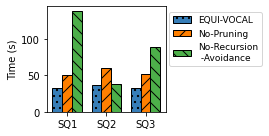

In [9]:
methods = ["optimized", "no_pruning", "no_recursion_avoidance"]

data = []
for method in methods: 
    data_per_method = []
    for query_id in [1, 2, 3]:
        mean_runtime = []
        for run in range(20):
            with open(os.path.join("/gscratch/balazinska/enhaoz/complex_event_video/src/quivr/outputs/query_execution", "SQ{}_{}_{}.ans".format(query_id, method, run)), 'r') as f:
                lines = f.readlines()
                lines = [line.rstrip() for line in lines]
            runtime = 0
            for line in lines:
                if line.startswith("Time: "):
                    runtime += float(line.split(" ")[1]) / 1000
            mean_runtime.append(runtime)
        print("method: {}, query: SQ{}, mean runtime: {}\n".format(method, query_id, np.mean(mean_runtime)))
        data_per_method.append(np.mean(mean_runtime))
    data.append(data_per_method)

labels = ["SQ1", "SQ2", "SQ3"]

fig, ax = plt.subplots(1, 1, figsize = (2.5, 2))

ax.bar(np.array(range(len(data[0])))*4-3, data[0], 1, label="EQUI-VOCAL", color=CB_color_cycle[0], hatch = '..', edgecolor="black")

ax.bar(np.array(range(len(data[1])))*4-2, data[1], 1, label="No-Pruning", color=CB_color_cycle[1], hatch = '//', edgecolor="black")

ax.bar(np.array(range(len(data[2])))*4-1, data[2], 1, label="No-Recursion\n -Avoidance", color=CB_color_cycle[2], hatch = '\\\\', edgecolor="black")


ax.set(ylabel="Time (s)")

# ax.set_ylim(bottom=0.5, top=1.05)
ax.set_xticks(range(-2, len(labels)*4-2, 4), labels)

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, prop={"size":9}, loc='right', bbox_to_anchor=(1.5, 0.7),
          fancybox=True, shadow=False, ncol=1)
# fig.legend(handles, labels, prop={"size":10}, loc='upper center', bbox_to_anchor=(0.5, 0.0), fancybox=True, shadow=False, ncol=3)
# ax.legend()
plt.subplots_adjust(bottom=0.15)
fig.tight_layout()
    
plt.savefig("figures/query_execution.pdf", bbox_inches='tight', pad_inches=0, dpi=600)

[w/ caching] # data: 200, f1_median: 0.67, runtime_median: 28.0
[w/o caching] # data: 200, f1_median: 0.67, runtime_median: 74.0


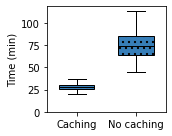

In [8]:
dataset_name = "synthetic_scene_graph_with_duration-npred_5-nattr_pred_2-new-40"
method = "vocal_postgres-topk"
exp_dir = "/gscratch/balazinska/enhaoz/complex_event_video/src/quivr/outputs/{}".format(dataset_name)

fig, ax = plt.subplots(1, 1, figsize = (2.5, 2))

cpu_value = 4
handles_f1 = []
handles_runtime = []
legend_labels = []

f1_data = []
runtime_data = []

# With caching
f1 = []
runtime = []
dir_name = os.path.join(exp_dir, "stats", method + "-cpu_4")
for filename in os.listdir(dir_name):
    try:
        with open(os.path.join(dir_name, filename), "r") as f:
            stats = json.load(f)
        f1.extend(stats["score_median"])
        runtime.extend(stats["runtime"])
    except:
        pass

f1 = np.array(f1)
runtime = np.array(runtime)/60.0


f1_slice = f1[:, 0]
runtime_slice = runtime[:, 0]
if np.all(f1_slice == -1):
    f1_slice = np.zeros_like(f1_slice)
else:
    f1_slice[f1_slice == -1] = np.nan
f1_slice = f1_slice[~np.isnan(f1_slice)]
if np.all(runtime_slice == -1):
    runtime_slice = np.zeros_like(runtime_slice)
else:
    runtime_slice[runtime_slice == -1] = np.nan
runtime_slice = runtime_slice[~np.isnan(runtime_slice)]
print("[w/ caching] # data: {}, f1_median: {}, runtime_median: {}".format(len(f1_slice), np.round(np.median(f1_slice), 3), np.round(np.median(runtime_slice))))
f1_data = f1_slice
runtime_data.append(runtime_slice)

# Without caching
f1 = []
runtime = []
dir_name = os.path.join("/gscratch/balazinska/enhaoz/complex_event_video/src/quivr/outputs/no_caching/{}".format(dataset_name), "stats", method + "-cpu_4")
for filename in os.listdir(dir_name):
    try:
        with open(os.path.join(dir_name, filename), "r") as f:
            stats = json.load(f)
        f1.extend(stats["score_median"])
        runtime.extend(stats["runtime"])
    except:
        pass

f1 = np.array(f1)
runtime = np.array(runtime)/60.0


f1_slice = f1[:, 0]
runtime_slice = runtime[:, 0]
if np.all(f1_slice == -1):
    f1_slice = np.zeros_like(f1_slice)
else:
    f1_slice[f1_slice == -1] = np.nan
f1_slice = f1_slice[~np.isnan(f1_slice)]
if np.all(runtime_slice == -1):
    runtime_slice = np.zeros_like(runtime_slice)
else:
    runtime_slice[runtime_slice == -1] = np.nan
runtime_slice = runtime_slice[~np.isnan(runtime_slice)]
print("[w/o caching] # data: {}, f1_median: {}, runtime_median: {}".format(len(f1_slice), np.round(np.median(f1_slice), 3), np.round(np.median(runtime_slice))))
f1_data = f1_slice
runtime_data.append(runtime_slice)


bp_runtime = ax.boxplot(runtime_data,  
               sym='.', widths=0.6, showfliers=False, patch_artist=True, boxprops=dict(facecolor=CB_color_cycle[0], hatch = '..'),
               medianprops = dict(color='black'))   

# handles_runtime.append(bp_runtime["boxes"][0])

ax.set(ylabel="Time (min)")
ax.set_ylim(bottom=0)
# ax.set_yscale('log')
ax.set_xticklabels(["Caching", "No caching"])
# plt.xticks(fontsize=14, rotation=45)

plt.subplots_adjust(bottom=0.15)
fig.tight_layout()
plt.savefig("figures/caching.pdf", bbox_inches='tight', pad_inches=0, dpi=600)